In [1]:
#Step 1: Import the necessary libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
df=pd.read_csv('Customer Segmentation.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [5]:
df.isnull().sum()


ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
dtype: int64

In [7]:
# To impute missing values for all numerical variables using the mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# For categorical columns, fill with mode
for column in df.select_dtypes(include=['object', 'category']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

/var/folders/5h/202dqzmn7c57l1fz0_rgqdxr0000gn/T/ipykernel_6967/4255870725.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [9]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,10695.000000,10695.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.212002,1.503900
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,2.844052
75%,465733.500000,53.000000,3.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Define features and target
X = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size']]
y = df['Spending_Score']  # Assuming it's labeled as Low/Medium/High

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

     Average       0.66      0.73      0.69       780
        High       0.66      0.63      0.65       492
         Low       0.89      0.86      0.88      1937

    accuracy                           0.80      3209
   macro avg       0.74      0.74      0.74      3209
weighted avg       0.80      0.80      0.80      3209

Accuracy: 0.7965098161421004


                    ID    Gender  Ever_Married        Age  Graduated  \
Cluster                                                                
0        463526.287030  0.615893      0.984988  55.300641   0.745196   
1        463321.297421  0.411162      0.330978  38.215825   0.870717   
2        463511.605649  0.557880      0.172594  28.203626   0.168759   

         Profession  Work_Experience  Family_Size  Cluster  
Cluster                                                     
0          2.501801         1.278421     2.644382      0.0  
1          1.873896         5.536862     1.988743      1.0  
2          4.078103         2.076941     4.036148      2.0  


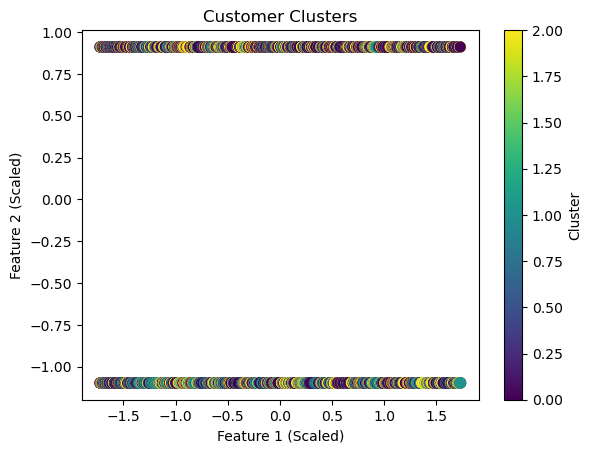

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Ensure 'X' contains only numeric features
X = df.select_dtypes(include='number')  # Select numeric columns for clustering

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use KMeans for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)  # Add cluster labels to the original DataFrame

# Analyze clusters
# Ensure groupby doesn't include non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns
print(df.groupby('Cluster')[numeric_columns].mean())

# Visualize clusters (using the first two principal features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Cluster')
plt.show()
